In [3]:
import hh
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(hh)

<module 'hh' from '/Users/riekelabbackup/Desktop/Vyom/Exercises/545/W5_diffeq/hh.py'>

In [4]:
neuron = hh.HH()
Iext = np.zeros(len(neuron.time))
Iext[500:] = -7
neuron.simulate(Iext)

100%|██████████| 49999/49999 [00:00<00:00, 85476.73it/s]


Text(0, 0.5, 'h')

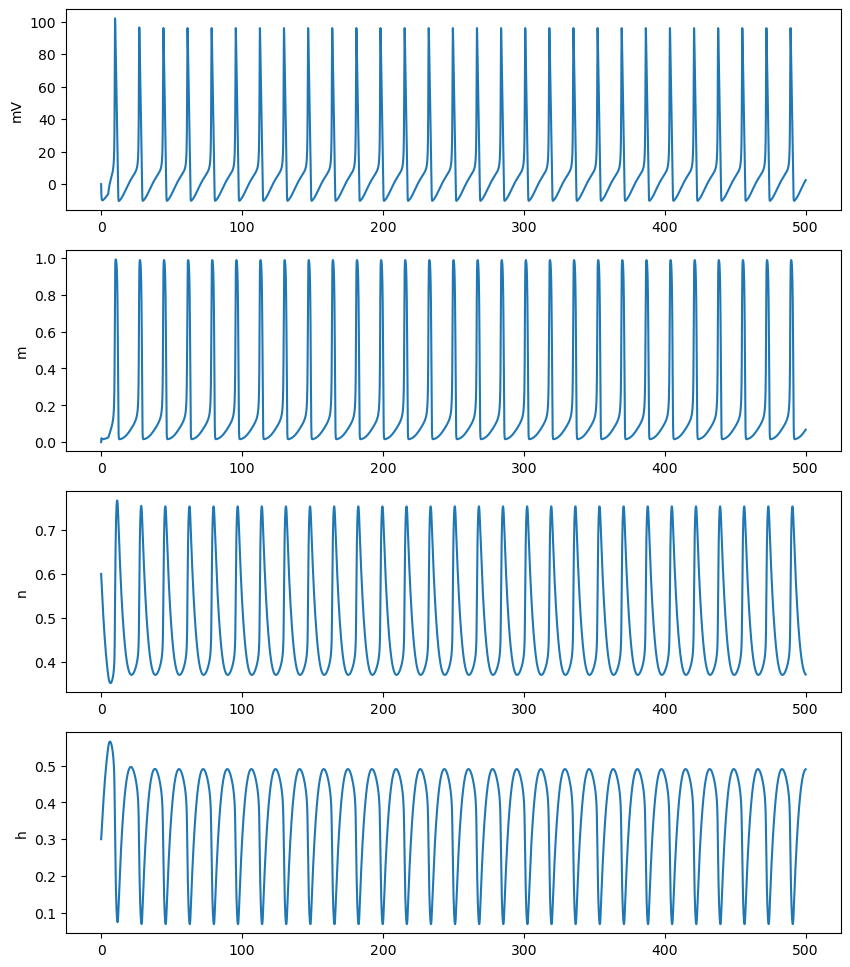

In [5]:
f, axs = plt.subplots(nrows=4, figsize=(10, 12))
axs[0].plot(neuron.time, -neuron.arr_V)
axs[0].set_ylabel('mV')

axs[1].plot(neuron.time, neuron.arr_m)
axs[1].set_ylabel('m')

axs[2].plot(neuron.time, neuron.arr_n)
axs[2].set_ylabel('n')

axs[3].plot(neuron.time, neuron.arr_h)
axs[3].set_ylabel('h')

In [10]:
importlib.reload(hh)

<module 'hh' from '/Users/riekelabbackup/Desktop/Vyom/Exercises/545/W5_diffeq/hh.py'>

In [41]:
neuron.time.shape

(1000,)

In [21]:
neuron = hh.HH(tFinal=10)
V_clamp = -50
arr_V = np.zeros(len(neuron.time))
arr_V[10:] = V_clamp
neuron.initialize()
neuron.simulate_Vclamp(arr_V)

100%|██████████| 999/999 [00:00<00:00, 67400.87it/s]


In [120]:
ls_arr_V = []
ls_arr_Ina = []
arr_Vclamps = np.arange(-60, 61, 10) #[-65]
for V_clamp in arr_Vclamps:
    arr_V = np.zeros(len(neuron.time)) #- 65
    arr_V[100:] = V_clamp
    # arr_V[800:] = -65
    neuron.initialize()
    neuron.simulate_Vclamp(arr_V);

    ls_arr_V.append(neuron.arr_V)
    ls_arr_Ina.append(neuron.arr_Ina)


  0%|          | 0/999 [00:00<?, ?it/s]/Users/riekelabbackup/Desktop/Vyom/Exercises/545/W5_diffeq/hh.py:56: RuntimeWarning: invalid value encountered in double_scalars
  dm = self.dt * (-self.arr_m[i]*(alpham + betam) + alpham)
100%|██████████| 999/999 [00:00<00:00, 92047.84it/s]


(0.0, 1.0, 0.0, 1.0)

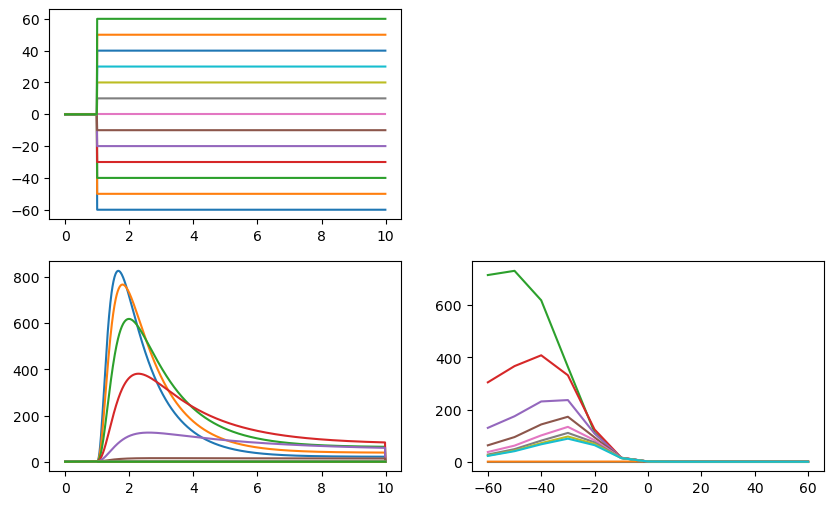

In [121]:
# Compute I-V relation using arr_I max
arr_Imax = np.zeros(len(ls_arr_V))
for idx in range(len(ls_arr_V)):
    arr_Imax[idx] = np.max(ls_arr_Ina[idx])


f, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
for idx in range(len(ls_arr_Ina)):
    axs[0, 0].plot(neuron.time, ls_arr_V[idx])
    axs[1, 0].plot(neuron.time, ls_arr_Ina[idx])
for t in range(0, neuron.arr_Ina.shape[0], 100):
    axs[1, 1].plot(arr_Vclamps, [ls_arr_Ina[na_idx][t] for na_idx in range(len(ls_arr_Ina))], c='')

axs[0, 1].axis('off')


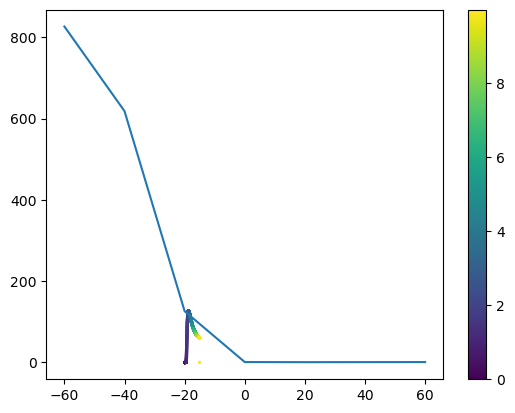

In [114]:
# plt.plot(neuron.arr_Ina)
plt.scatter([-20]*len(neuron.arr_Ina) + np.linspace(0, 5, len(neuron.arr_Ina)), ls_arr_Ina[2], c=neuron.time, s=2)
plt.plot(arr_Vclamps, arr_Imax)
plt.colorbar()